# House dataset

In [1]:
#import libraries and dependencies
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import csv
import scipy.stats as st
from scipy.stats import linregress, trim_mean
from sklearn import preprocessing
import statsmodels.api as st

## Data Collection

In [2]:
house_data = pd.read_csv('For_EDA_dataset.csv', index_col="Unnamed: 0")
house_data.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,Self,Self,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,Self,Self,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,Self,Self,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,Self,Self,40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,8.0


the records from column price are in millions in order to make the feature price more readable when generating the statistic summary

In [3]:
house_data["price"]=house_data['price']/100000


then I proceed to examin the data set by checking for null and unique values and data types

In [4]:
house_data.isnull().sum()

property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Area_in_Marla    0
dtype: int64

In [5]:
house_data.nunique()

property_type        7
price             2077
location          1509
city                 5
province_name        3
latitude          7838
longitude         8316
baths               16
purpose              2
bedrooms            23
date_added         124
agency            5762
agent            10599
Area_in_Marla      337
dtype: int64

In [107]:
house_data.dtypes

property_type            object
price                   float64
location                 object
city                     object
province_name            object
latitude                float64
longitude               float64
baths                     int64
purpose                  object
bedrooms                  int64
date_added       datetime64[ns]
agency                   object
agent                    object
Area_in_Marla           float64
dtype: object

In [112]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153427 entries, 0 to 168445
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   property_type  153427 non-null  object        
 1   price          153427 non-null  float64       
 2   location       153427 non-null  object        
 3   city           153427 non-null  object        
 4   province_name  153427 non-null  object        
 5   latitude       153427 non-null  float64       
 6   longitude      153427 non-null  float64       
 7   baths          153427 non-null  int64         
 8   purpose        153427 non-null  object        
 9   bedrooms       153427 non-null  int64         
 10  date_added     153427 non-null  datetime64[ns]
 11  agency         153427 non-null  object        
 12  agent          153427 non-null  object        
 13  Area_in_Marla  153427 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(7

In [106]:
#change data_added column to datetime
house_data['date_added'] = pd.to_datetime(house_data['date_added'])

## QUANTITATIVE VARIABLES STATS


## estimates of location and varability

In [7]:
house_datad=house_data[['price', 'baths','bedrooms','Area_in_Marla']]
round(house_datad.describe(),0)

,price,baths,bedrooms,Area_in_Marla
count,153430.0,153430.0,153430.0,153430.0
mean,184.0,3.0,3.0,12.0
std,362.0,2.0,2.0,95.0
min,0.0,0.0,0.0,0.0
25%,2.0,1.0,2.0,5.0
50%,87.0,3.0,3.0,8.0
75%,200.0,5.0,5.0,12.0
max,20000.0,403.0,68.0,16000.0


the data set contains several outliers for that reason another estimate of location needs to be calculated,
the MEDIAN and TREAM MEAN are a more suitable estimate for location since they are less impacted by the presence of outliers.
for estimates of variability. the median absolute deviation MAD, the standard deviation and the inner quartile are more suitable for this data set.

In [8]:
tmean_price = trim_mean(house_data["price"], 0.1)
median_price =np.median(house_data["price"])
std_price =house_data["price"].std()
IQR_price =house_data["price"].quantile(0.75)-house_data["price"].quantile(0.25)
mad_price = st.robust.scale.mad(house_data["price"])
tmean_baths = trim_mean(house_data["baths"], 0.1)
median_baths =np.median(house_data["baths"])
std_baths =house_data["baths"].std()
IQR_baths =house_data["baths"].quantile(0.75)-house_data["baths"].quantile(0.25)
mad_baths =st.robust.scale.mad(house_data["baths"])
tmean_bedrooms = trim_mean(house_data["bedrooms"], 0.1)
median_bedrooms =np.median(house_data["bedrooms"])
std_bedrooms =house_data["bedrooms"].std()
IQR_bedrooms =house_data["bedrooms"].quantile(0.75)-house_data["bedrooms"].quantile(0.25)
mad_bedrooms =st.robust.scale.mad(house_data["bedrooms"])
tmean_area = trim_mean(house_data["Area_in_Marla"], 0.1)
median_area =np.median(house_data["Area_in_Marla"])
std_area =house_data["Area_in_Marla"].std()
IQR_area =house_data["Area_in_Marla"].quantile(0.75)-house_data["Area_in_Marla"].quantile(0.25)
mad_area =st.robust.scale.mad(house_data["Area_in_Marla"])

In [9]:
data = {'Variable': ['price', 'baths', 'bedrooms', 'Area'],
        'Tream_mean': [tmean_price, tmean_baths, tmean_bedrooms, tmean_area],
       'median': [median_price, median_baths, median_bedrooms, median_area],
       'STD': [std_price, std_baths, std_bedrooms, std_area],
       'IQR': [IQR_price, IQR_baths, IQR_bedrooms, IQR_area],
       'MAD': [mad_price, mad_baths, mad_bedrooms, mad_area]}
  
# Create DataFrame
df = pd.DataFrame(data)
df

,Variable,Tream_mean,median,STD,IQR,MAD
0,price,113.576634,87.0,362.471252,198.0,127.696529
1,baths,2.821181,3.0,2.494301,4.0,2.965204
2,bedrooms,3.217453,3.0,1.971117,3.0,1.482602
3,Area,8.918820,7.6,94.629860,7.1,4.447807


we can see how the quantitavive variables in this data set are extremely dispersed from the mean and highly skewed, this situation may exist because of the big difference on housing solution where these features are bastly different as well as data errors, after deleting extreme outliers its important to examine the data from each of the potential groups 

I proceed to delete the extreme outliers so the analisis can be done more efficiently

In [46]:
display(house_data.loc[(house_data.price >19000)])

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area_in_Marla


In [45]:
house_data= house_data.drop(labels=85499)

In [47]:
display(house_data.loc[(house_data.baths >300)])

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area_in_Marla
129605,House,150.0,Khayaban-e-Sir Syed,Rawalpindi,Punjab,33.638847,73.048089,403,For Sale,6,2019-07-04,Al-Rehman Estate & Developers,Raja Ahsan Rehman H,5.0


In [48]:
house_data= house_data.drop(labels=129605)

In [49]:
display(house_data.loc[(house_data.bedrooms >60)])

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area_in_Marla
140891,House,25.0,North Nazimabad,Karachi,Sindh,24.925361,67.039089,0,For Rent,68,2019-07-09,Zahid Corporation,Riaz Ahmed,132.0


In [50]:
house_data= house_data.drop(labels=140891)

## Data distribution

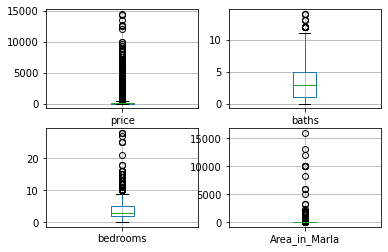

In [51]:

df1 = pd.DataFrame(house_data["price"])
df2 = pd.DataFrame(house_data["baths"])
df3 = pd.DataFrame(house_data["bedrooms"])
df4 = pd.DataFrame(house_data["Area_in_Marla"])

#define number of rows and columns for subplots
nrow=2
ncol=2

# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4]
fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].boxplot(ax=axes[r,c])
        count+=1

[Text(0, 0, 'Flat'),
 Text(1, 0, 'House'),
 Text(2, 0, 'Penthouse'),
 Text(3, 0, 'Farm House'),
 Text(4, 0, 'Lower Portion'),
 Text(5, 0, 'Upper Portion'),
 Text(6, 0, 'Room')]

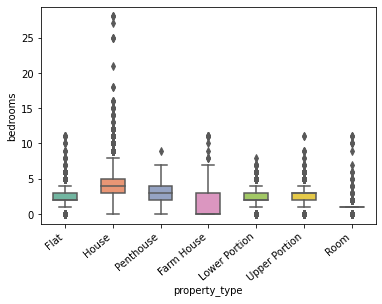

In [52]:

ax =sns.boxplot(x = house_data['property_type'],
            y = house_data['bedrooms'],
                        palette = 'Set2', width=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 


[Text(0, 0, 'Flat'),
 Text(1, 0, 'House'),
 Text(2, 0, 'Penthouse'),
 Text(3, 0, 'Farm House'),
 Text(4, 0, 'Lower Portion'),
 Text(5, 0, 'Upper Portion'),
 Text(6, 0, 'Room')]

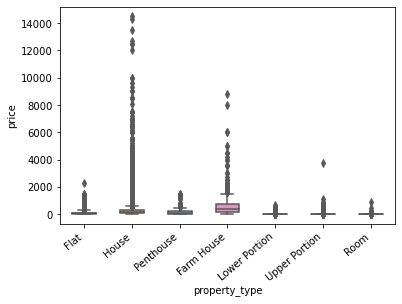

In [114]:
ax =sns.boxplot(x = house_data['property_type'],
            y = house_data['price'],
                        palette = 'Set2', width=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 

[Text(0, 0, 'Flat'),
 Text(1, 0, 'House'),
 Text(2, 0, 'Penthouse'),
 Text(3, 0, 'Farm House'),
 Text(4, 0, 'Lower Portion'),
 Text(5, 0, 'Upper Portion'),
 Text(6, 0, 'Room')]

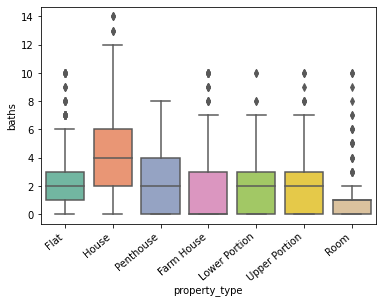

In [53]:
ax =sns.boxplot(x = house_data['property_type'],
            y = house_data['baths'],
                        palette = 'Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 

[Text(0, 0, 'Flat'),
 Text(1, 0, 'House'),
 Text(2, 0, 'Penthouse'),
 Text(3, 0, 'Farm House'),
 Text(4, 0, 'Lower Portion'),
 Text(5, 0, 'Upper Portion'),
 Text(6, 0, 'Room')]

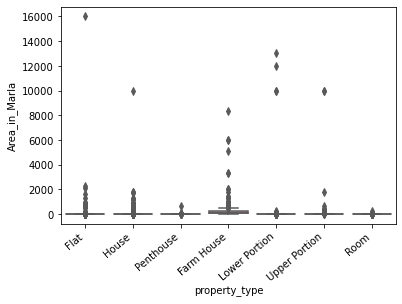

In [54]:
ax =sns.boxplot(x = house_data['property_type'],
            y = house_data['Area_in_Marla'],
                        palette = 'Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 


Text(0.5, 1.0, 'housing data price(in millions) histogram')

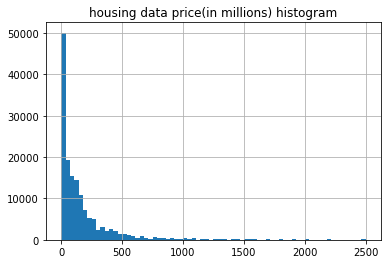

In [121]:
hist = house_data.price.hist(bins=70, range=[0, 2500])
plt.title("housing data price(in millions) histogram")

Text(0.5, 1.0, 'housing data number of baths histogram')

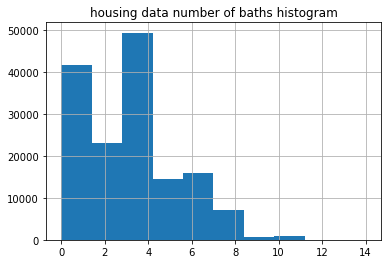

In [122]:
hist = house_data.baths.hist()
plt.title("housing data number of baths histogram")

Text(0.5, 1.0, 'housing data number of bedrooms histogram')

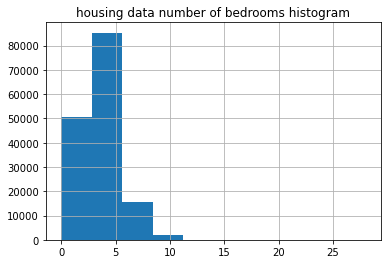

In [123]:
hist = house_data.bedrooms.hist()
plt.title("housing data number of bedrooms histogram")

Text(0.5, 1.0, 'housing data Area histogram')

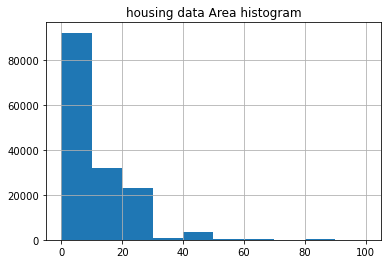

In [124]:
hist = house_data.Area_in_Marla.hist(range=[0, 100])
plt.title("housing data Area histogram")

## binary and categorical data exploration

Text(0.5, 1.0, 'housing data value counts per city')

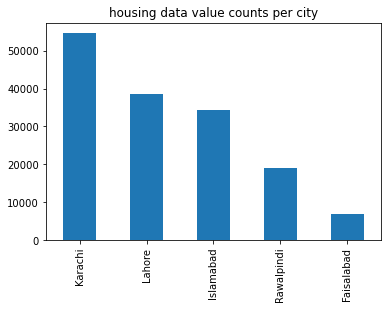

In [125]:
house_data['city'].value_counts().plot(kind='bar')
plt.title("housing data value counts per city")

Text(0.5, 1.0, 'housing data value counts per property type')

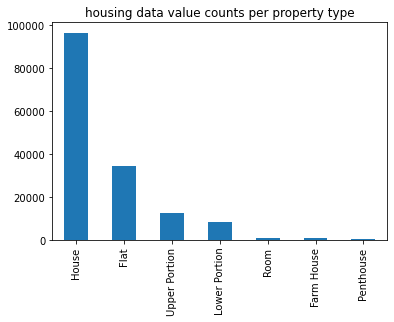

In [126]:
house_data['property_type'].value_counts().plot(kind='bar')
plt.title("housing data value counts per property type")

Text(0.5, 1.0, 'housing data per province')

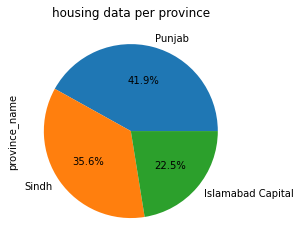

In [127]:
house_data['province_name'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("housing data per province")

Text(0.5, 1.0, 'housing data per porpuse')

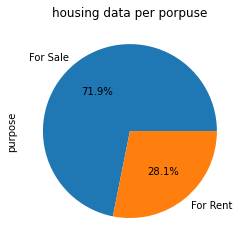

In [128]:
house_data['purpose'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("housing data per porpuse")

## Correlation

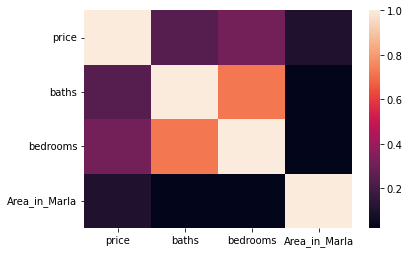

In [65]:
dataplot=sns.heatmap((house_data.loc[:, ~house_data.columns.isin(['latitude', 'longitude'])]).corr())
  
# displaying heatmap
plt.show()

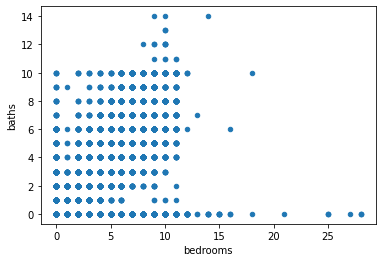

In [68]:
ax= house_data.plot.scatter(x="bedrooms", y="baths")

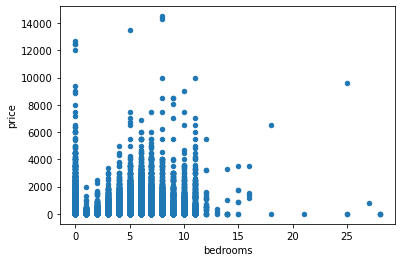

In [70]:
ax= house_data.plot.scatter(x="bedrooms", y="price")

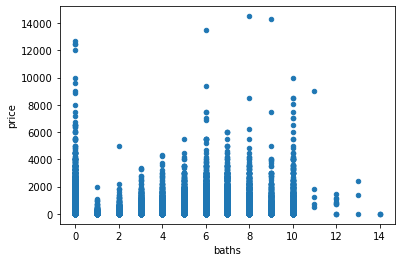

In [64]:
ax= house_data.plot.scatter(x="baths", y="price")

[Text(0, 0, 'Flat'),
 Text(1, 0, 'House'),
 Text(2, 0, 'Penthouse'),
 Text(3, 0, 'Farm House'),
 Text(4, 0, 'Lower Portion'),
 Text(5, 0, 'Upper Portion'),
 Text(6, 0, 'Room')]

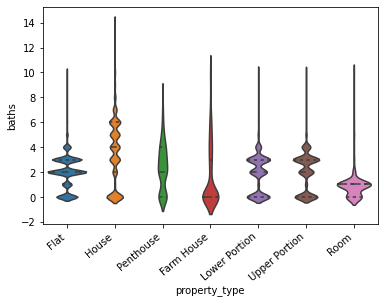

In [77]:
ax = sns.violinplot(x=house_data.property_type,y= house_data.baths, inner='quartile')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 

[Text(0, 0, 'Flat'),
 Text(1, 0, 'House'),
 Text(2, 0, 'Penthouse'),
 Text(3, 0, 'Farm House'),
 Text(4, 0, 'Lower Portion'),
 Text(5, 0, 'Upper Portion'),
 Text(6, 0, 'Room')]

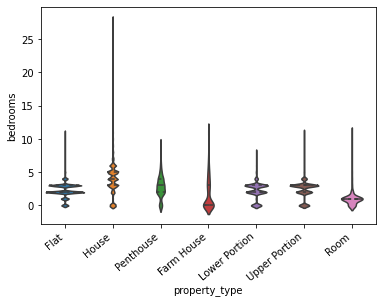

In [78]:
ax = sns.violinplot(x=house_data.property_type,y= house_data.bedrooms, inner='quartile')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 

In [101]:
s = house_data['agency'].value_counts().head(10)
s

Self                            42157
Mash Allah Estate & Builders      528
Real Investment Consultants       460
Arham Estate                      365
Future Planners                   364
Lahore Grande Estate              346
Chaudhry Estate                   339
Muzammil Associates               321
Makkah Associates                 302
ZPN Real Estate & Builders        294
Name: agency, dtype: int64

In [102]:
w = house_data['agent'].value_counts().head(10)
w

Self                                                                           42158
Azam Ali                                                                         504
Boez Ayub                                                                        453
Muhammad Imran                                                                   440
Kashif                                                                           308
Waseem                                                                           299
Azeem Amjad, Amjad Hussain Shah                                                  288
Waqar                                                                            276
Daud Ahmad(Co-CEO), Shafique Arshad Waince(Co-CEO), Zafar Iqbal Bajwa (CEO)      238
Abdul Rehman                                                                     236
Name: agent, dtype: int64

In [103]:
l = house_data['location'].value_counts().head(10)
l

DHA Defence               20932
Bahria Town Rawalpindi     7396
Bahria Town Karachi        7308
Bahria Town                5583
Gulistan-e-Jauhar          5148
Gulshan-e-Iqbal Town       4329
North Nazimabad            2973
North Karachi              2712
E-11                       2703
I-8                        2390
Name: location, dtype: int64

Text(0.5, 1.0, 'housing data value count time line')

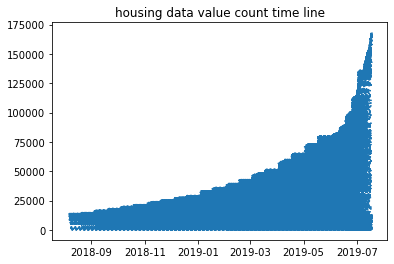

In [129]:
plt.plot(house_data['date_added'], house_data.index, linestyle = 'dotted')
plt.title("housing data value count time line")

<AxesSubplot:xlabel='date_added'>

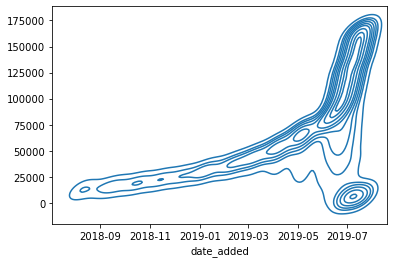

In [111]:
ax= sns.kdeplot(house_data['date_added'],y=house_data.index)
ax